## Running linear regression using sklearn

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.rcParams['figure.figsize'] = [20.0, 10.0]

http://bigdataexaminer.com/uncategorized/how-to-run-linear-regression-in-python-scikit-learn/

http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

The scikit-learn project started as scikits.learn, a Google Summer of Code project by David Cournapeau. Its name stems from the notion that it is a "SciKit" (SciPy Toolkit), a separately-developed and distributed third-party extension to SciPy

In [78]:
data = pd.read_csv('housing_data.txt', sep='\s+',header = None)

In [79]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [80]:
data.columns = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM',\
                'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [81]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- CRIM      per capita crime rate by town
- ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS     proportion of non-retail business acres per town
- CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX       nitric oxides concentration (parts per 10 million)
- RM        average number of rooms per dwelling
- AGE       proportion of owner-occupied units built prior to 1940
- DIS       weighted distances to five Boston employment centres
- RAD       index of accessibility to radial highways
- TAX      full-value property-tax rate per \$10,000
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    \% lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

In [172]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [171]:
data.values[0]

array([  6.32000000e-03,   1.80000000e+01,   2.31000000e+00,
         0.00000000e+00,   5.38000000e-01,   6.57500000e+00,
         6.52000000e+01,   4.09000000e+00,   1.00000000e+00,
         2.96000000e+02,   1.53000000e+01,   3.96900000e+02,
         4.98000000e+00,   2.40000000e+01])

$y = f(CRIM)$

단변량 linear regression

In [163]:
from  sklearn.linear_model import LinearRegression

In [164]:
X = data['CRIM']
y = data['MEDV']

In [165]:
X = np.array(X)
y = np.array(y)

In [149]:
X.reshape(1,-1).shape

(1, 506)

In [93]:
X.shape

(506,)

In [167]:
X = X.reshape(-1,1)
# One shape dimension can be -1. In this case, the value is inferred from the length of the array and remaining dimensions.

In [89]:
y = y.reshape(-1,1)

In [86]:
reg = LinearRegression()

In [98]:
reg.fit?

In [168]:
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
reg.coef_

array([[-0.41519028]])

In [16]:
reg.intercept_

array([ 24.03310617])

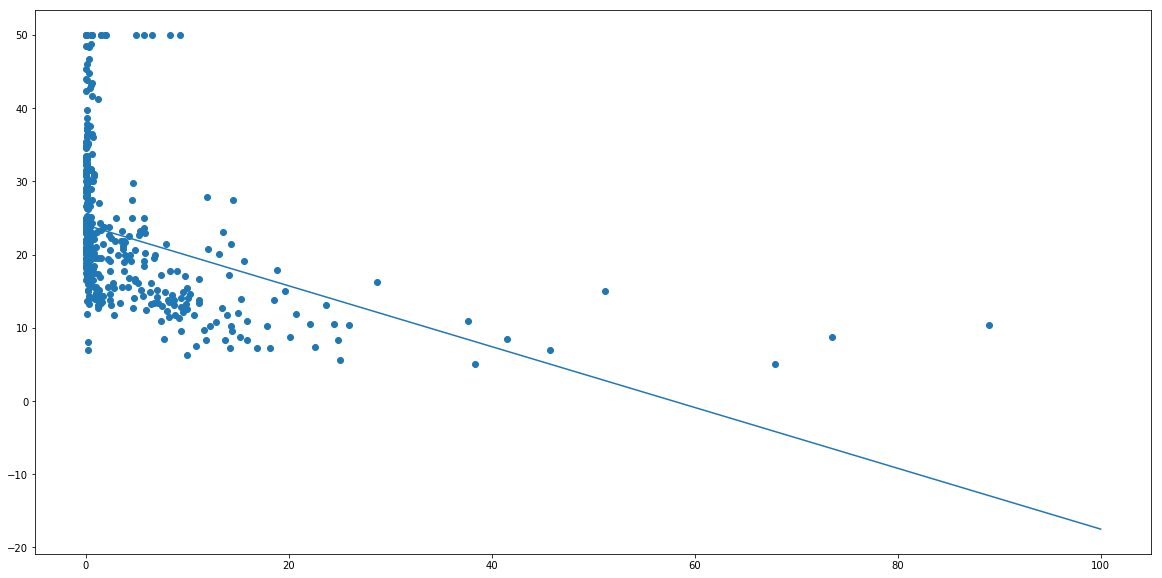

In [17]:
plt.scatter(X,y)

#linear regrssison 결과
x = np.linspace(0,100,num=1000)
plt.plot(x,reg.intercept_[0] + x*reg.coef_[0])
plt.show()

## 실습: CRIM외의 다른 feature를 사용하여 linear regression을 학습하고 결과를 plot

In [99]:
X = data['AGE']
y = data['MEDV']

In [100]:
X = np.array(X)
y = np.array(y)

In [101]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [102]:
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
reg.coef_

array([[-0.12316272]])

In [104]:
reg.intercept_

array([ 30.97867776])

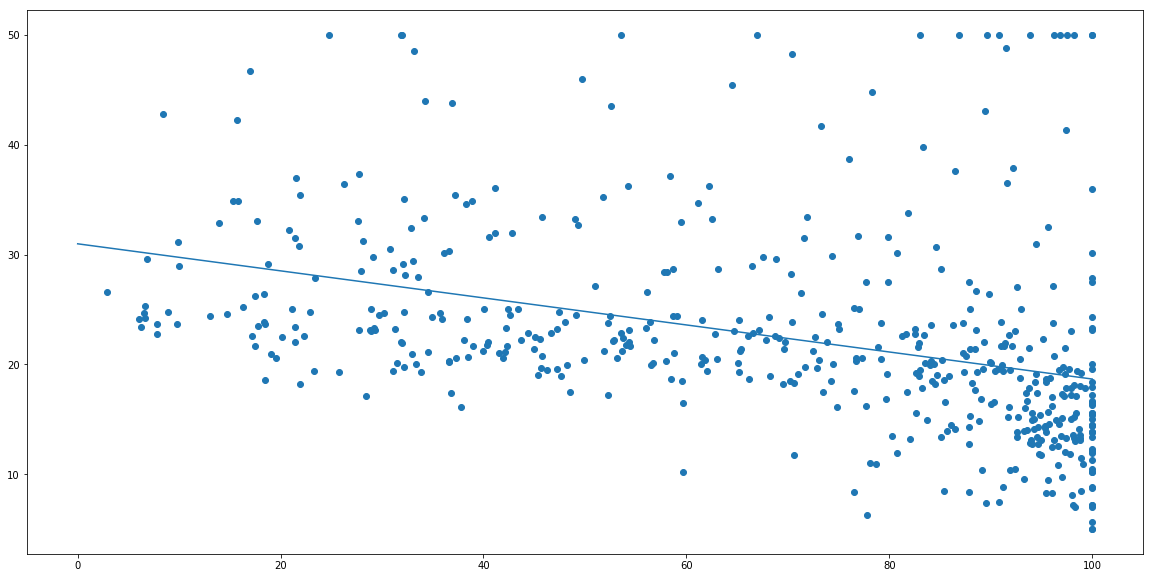

In [105]:
plt.scatter(X,y)

#linear regrssison 결과
x = np.linspace(0,100,num=1000)
plt.plot(x,reg.intercept_[0] + x*reg.coef_[0])
plt.show()

$y = a * CRIM + b * ZN + intercept$

다변량 linear regression

In [109]:
X = data[['CRIM','ZN']]
y = data['MEDV']

In [110]:
X = np.array(X)
y = np.array(y)

In [108]:
X = X.reshape(-1,2)

In [28]:
y = y.reshape(-1,1)

In [29]:
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
reg.coef_

array([[-0.35207832,  0.11610909]])

Validation of linear regression

* Split test and train dataset

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                    test_size=0.33, random_state=42)

In [117]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [118]:
reg.coef_

array([-0.38814589,  0.10886775])

In [119]:
print("Mean squared error: %.2f"% \
      mean_squared_error(y_test, reg.predict(X_test)))

Mean squared error: 54.85


In [121]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 실습: 모든 feature ('CRIM', 'ZN',  'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT') 를 사용하여 linear regression을 학습하고 성능을 비교

In [155]:
X = data[['CRIM','ZN', 'INDUS','CHAS','NOX','RM',\
          'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = data['MEDV']

In [156]:
X = np.array(X)
y = np.array(data['MEDV'])

In [124]:
X = X.reshape(-1,13)
y = y.reshape(-1,1)

In [157]:
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                    test_size=0.33, random_state=42)

In [159]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [160]:
reg.coef_

array([ -1.28749718e-01,   3.78232228e-02,   5.82109233e-02,
         3.23866812e+00,  -1.61698120e+01,   3.90205116e+00,
        -1.28507825e-02,  -1.42222430e+00,   2.34853915e-01,
        -8.21331947e-03,  -9.28722459e-01,   1.17695921e-02,
        -5.47566338e-01])

In [130]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, reg.predict(X_test)))

Mean squared error: 20.72


## Lasso Linear Regression

$(1 / (2 * nsamples)) * ||y - Xw||^2_2 + alpha * ||w||_1$

In [44]:
from sklearn import linear_model

normalization

In [45]:
normalized_data=(data-data.min())/(data.max()-data.min())

In [46]:
normalized_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409,0.389618
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049,0.204380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040,0.267222
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728,0.360000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
X = normalized_data[['CRIM','ZN', 'INDUS','CHAS',\
                     'NOX','RM','AGE','DIS','RAD',\
                     'TAX','PTRATIO','B','LSTAT']]
y = data['MEDV']

In [131]:
X = np.array(X)
y = np.array(y)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                    test_size=0.33, random_state=42)

In [139]:
clf = linear_model.Lasso(alpha=1)

In [140]:
clf.fit(X_train, y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [141]:
clf.coef_

array([-0.07842771,  0.03504406, -0.        ,  0.        , -0.        ,
        1.13102167,  0.00772442, -0.64811663,  0.18629574, -0.00941185,
       -0.7018402 ,  0.01109515, -0.78553954])

In [142]:
print("Mean squared error: %.2f"% \
      mean_squared_error(y_test, clf.predict(X_test)))

Mean squared error: 25.37


Lasso path

.

(-0.050000000000000003, 1.05, -16.862020588385242, 41.576522510845855)

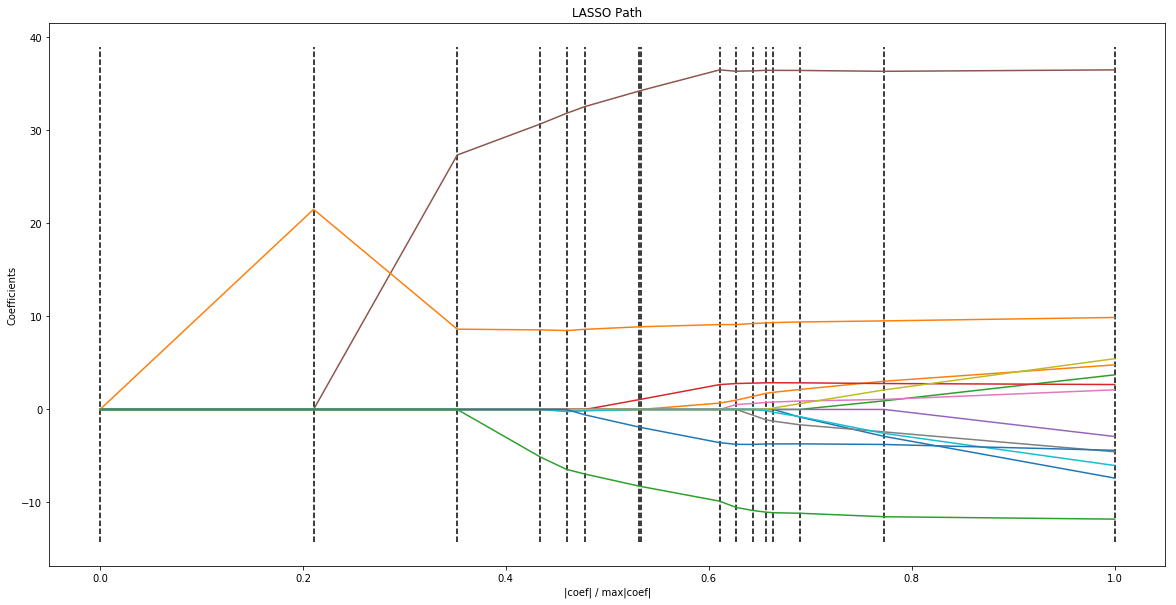

In [143]:
X = normalized_data[['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y = data['MEDV']

X = np.array(X)
y = np.array(y)

alphas, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')

## 실습: Diabetes dataset을 이용한 linear regression

In [55]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

AGE SEX BMI BP S1 S2 S3 S4 S5 S6 Y

age, sex, body mass index, average blood pressure, and six blood serum measurements

In [56]:
df = pd.DataFrame(X)

In [57]:
target = pd.DataFrame(y)

In [58]:
df = pd.concat([df,target],axis=1)

In [59]:
df.columns = ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']

In [60]:
df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [61]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [62]:
X = df[['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']]
y = df['Y']

In [63]:
X = np.array(X)
y = np.array(y)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

다변량 linear regression

In [65]:
reg = LinearRegression()

In [66]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, reg.predict(X_test)))

Mean squared error: 2817.80


In [68]:
reg.coef_

array([  32.14567288, -242.82582016,  559.98738213,  407.64166457,
       -718.68703857,  396.63010925,   10.42304776,  171.81177553,
        627.07976426,  -21.62420711])

Lasso regression

In [69]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [70]:
X = normalized_df[['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']]
y = df['Y']

In [71]:
X = np.array(X)
y = np.array(y)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
clf = linear_model.Lasso(alpha=0.1)

In [74]:
clf.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [75]:
clf.coef_

array([   5.04742781,  -21.45573351,  147.91617239,   95.46213973,
        -48.60662057,   -0.        ,  -65.61292952,   14.4614904 ,
        109.78131511,   -0.        ])

In [76]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, clf.predict(X_test)))

Mean squared error: 2817.25
